# Classify the patients of Parkinson’s Disease (PD) into the respective labels using the attributes from their voice recordings

## Contest:-
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range).
Since there is no definitive laboratory test to diagnose PD, diagnosis is often
difficult, particularly in the early stages when motor effects are not yet severe. 
Since PD patients exhibit characteristic vocal
features, voice recordings are a useful and non-invasive tool for diagnosis. If
machine learning algorithms could be applied to a voice recording dataset to
accurately diagnosis PD, this would be an effective screening step prior to an
appointment with a clinician

## Attribute Information:


- **Name** - ASCII subject name and recording number
- **MDVP**:Fo(Hz) - Average vocal fundamental frequency
- **MDVP**:Fhi(Hz) - Maximum vocal fundamental frequency
- **MDVP**:Flo(Hz) - Minimum vocal fundamental frequency
- **MDVP**:Jitter(%)
- **MDVP**:Jitter(Abs)
- **MDVP**:RAP 
- **MDVP**:PPQ 
- **Jitter**:DDP - Several measures of variation in fundamental frequency
- **MDVP**:Shimmer
- **MDVP**:Shimmer(dB)
- **Shimmer**:APQ3
- **Shimmer**:APQ5
- **MDVP**:APQ,
- **Shimmer**:DDA - Several measures of variation in amplitude
- **NHR,HNR** - Two measures of ratio of noise to tonal components in the voice
- **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
- **RPDE,D2** - Two nonlinear dynamical complexity measures
- **DFA** - Signal fractal scaling exponent
- **spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation 9. 

   car name: string (unique for each instance)

## Import all necessary modules and load the data

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
# more libraries will add of bagging,adaboosting etc

In [2]:
df=pd.read_csv('Data - Parkinsons.csv')

### Print top 10 rows from the dataset

In [3]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### Print bottom 10 rows of dataset

In [4]:
df.tail(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,...,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### Print the datatypes of each column and the shape of the dataset

In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
df.shape

(195, 24)

   #####             Original dataset has 195 rows and 24 cloumns(attributes)

### To check whether dataset contains null values

In [7]:
print(df.isna().sum().sum())
print(df.isnull().sum().sum())


0
0


> No columns have null data in the file

In [8]:
    df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


> Observation:

-  There are total 195 records(rows) and 24 attributes(Columns).
-  The data contains voice samples of 31 persons(5 voice sample per person).
-  Data type of "name" attribute is "object" and status attribute has "int64", rest of the attributes has data type "float64".
-  There is no null value and missing values in the data.
-  Attribute "spread1" has all negative values.
-  We can drop "name" attribute as it has no impact in final classifiation.

In [9]:
adf= df.drop('name',axis=1)
adf

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


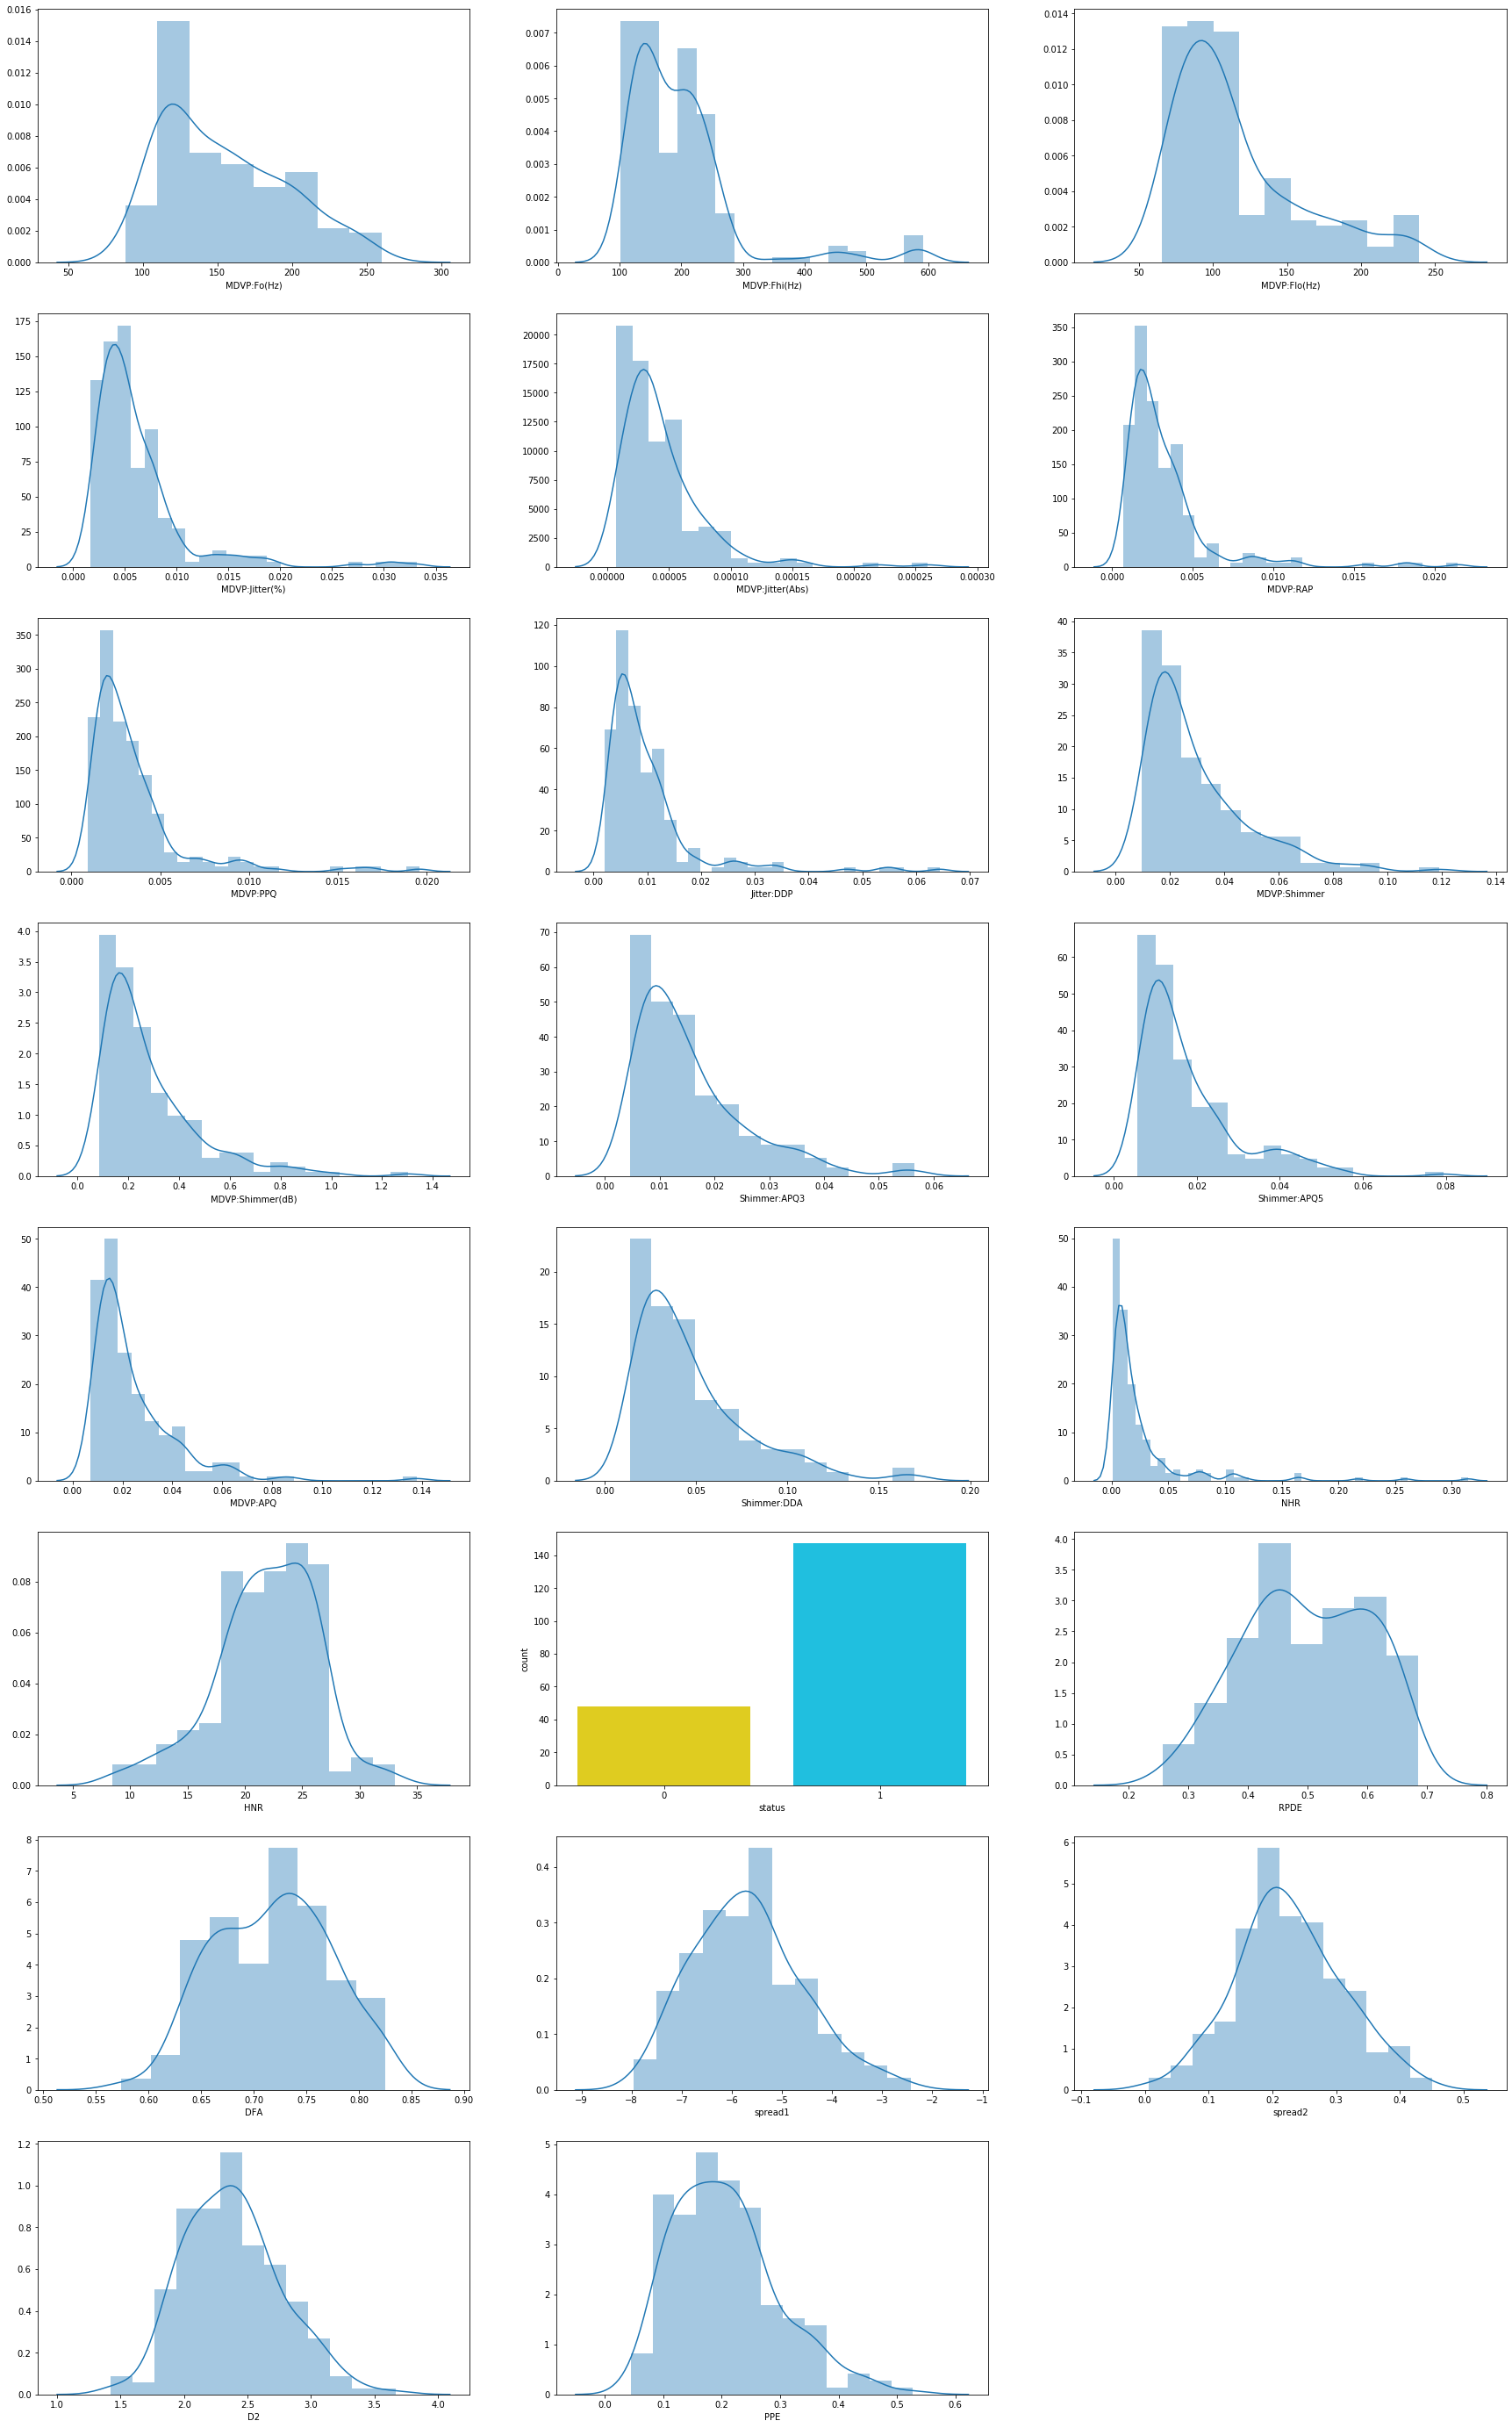

In [10]:
plt.figure(figsize= (30,50))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in adf.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(8, 3, pos)   # plot grid
    if feature not in ['status']:   # Plot histogram for all the continuous columns
         sns.distplot(df[feature], kde= True )   
    else:
        sns.countplot(df[feature], palette= 'jet_r')    # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one  


> observation 
- Attribute "MDVP:Fo(Hz)" is slightly left skewed 
- Attribute "MDVP:Fhi(Hz)", is highly left skewed, most outliers lies on right side.
- Atteibute "MDVP:Flo(Hz)" is left skewed but has less number of outliers
- Attribute-"MDVP:Jitter(%)","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ"    ,"Shimmer:DDA ","NHR", "MDVP:Jitter(Abs)"  and "MDVP:RAP" are highly left skewed and has high number of outliers.
- Attribute "HNR", "RPDE,D2","DFA","spread1,spread2,PPE" are quite normaly distributed.
- Attribute "status" or target class are imbalance, more people have parkinsons disease.

In [11]:
adf['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

> Out of 195 samples 145 are detected as PD.

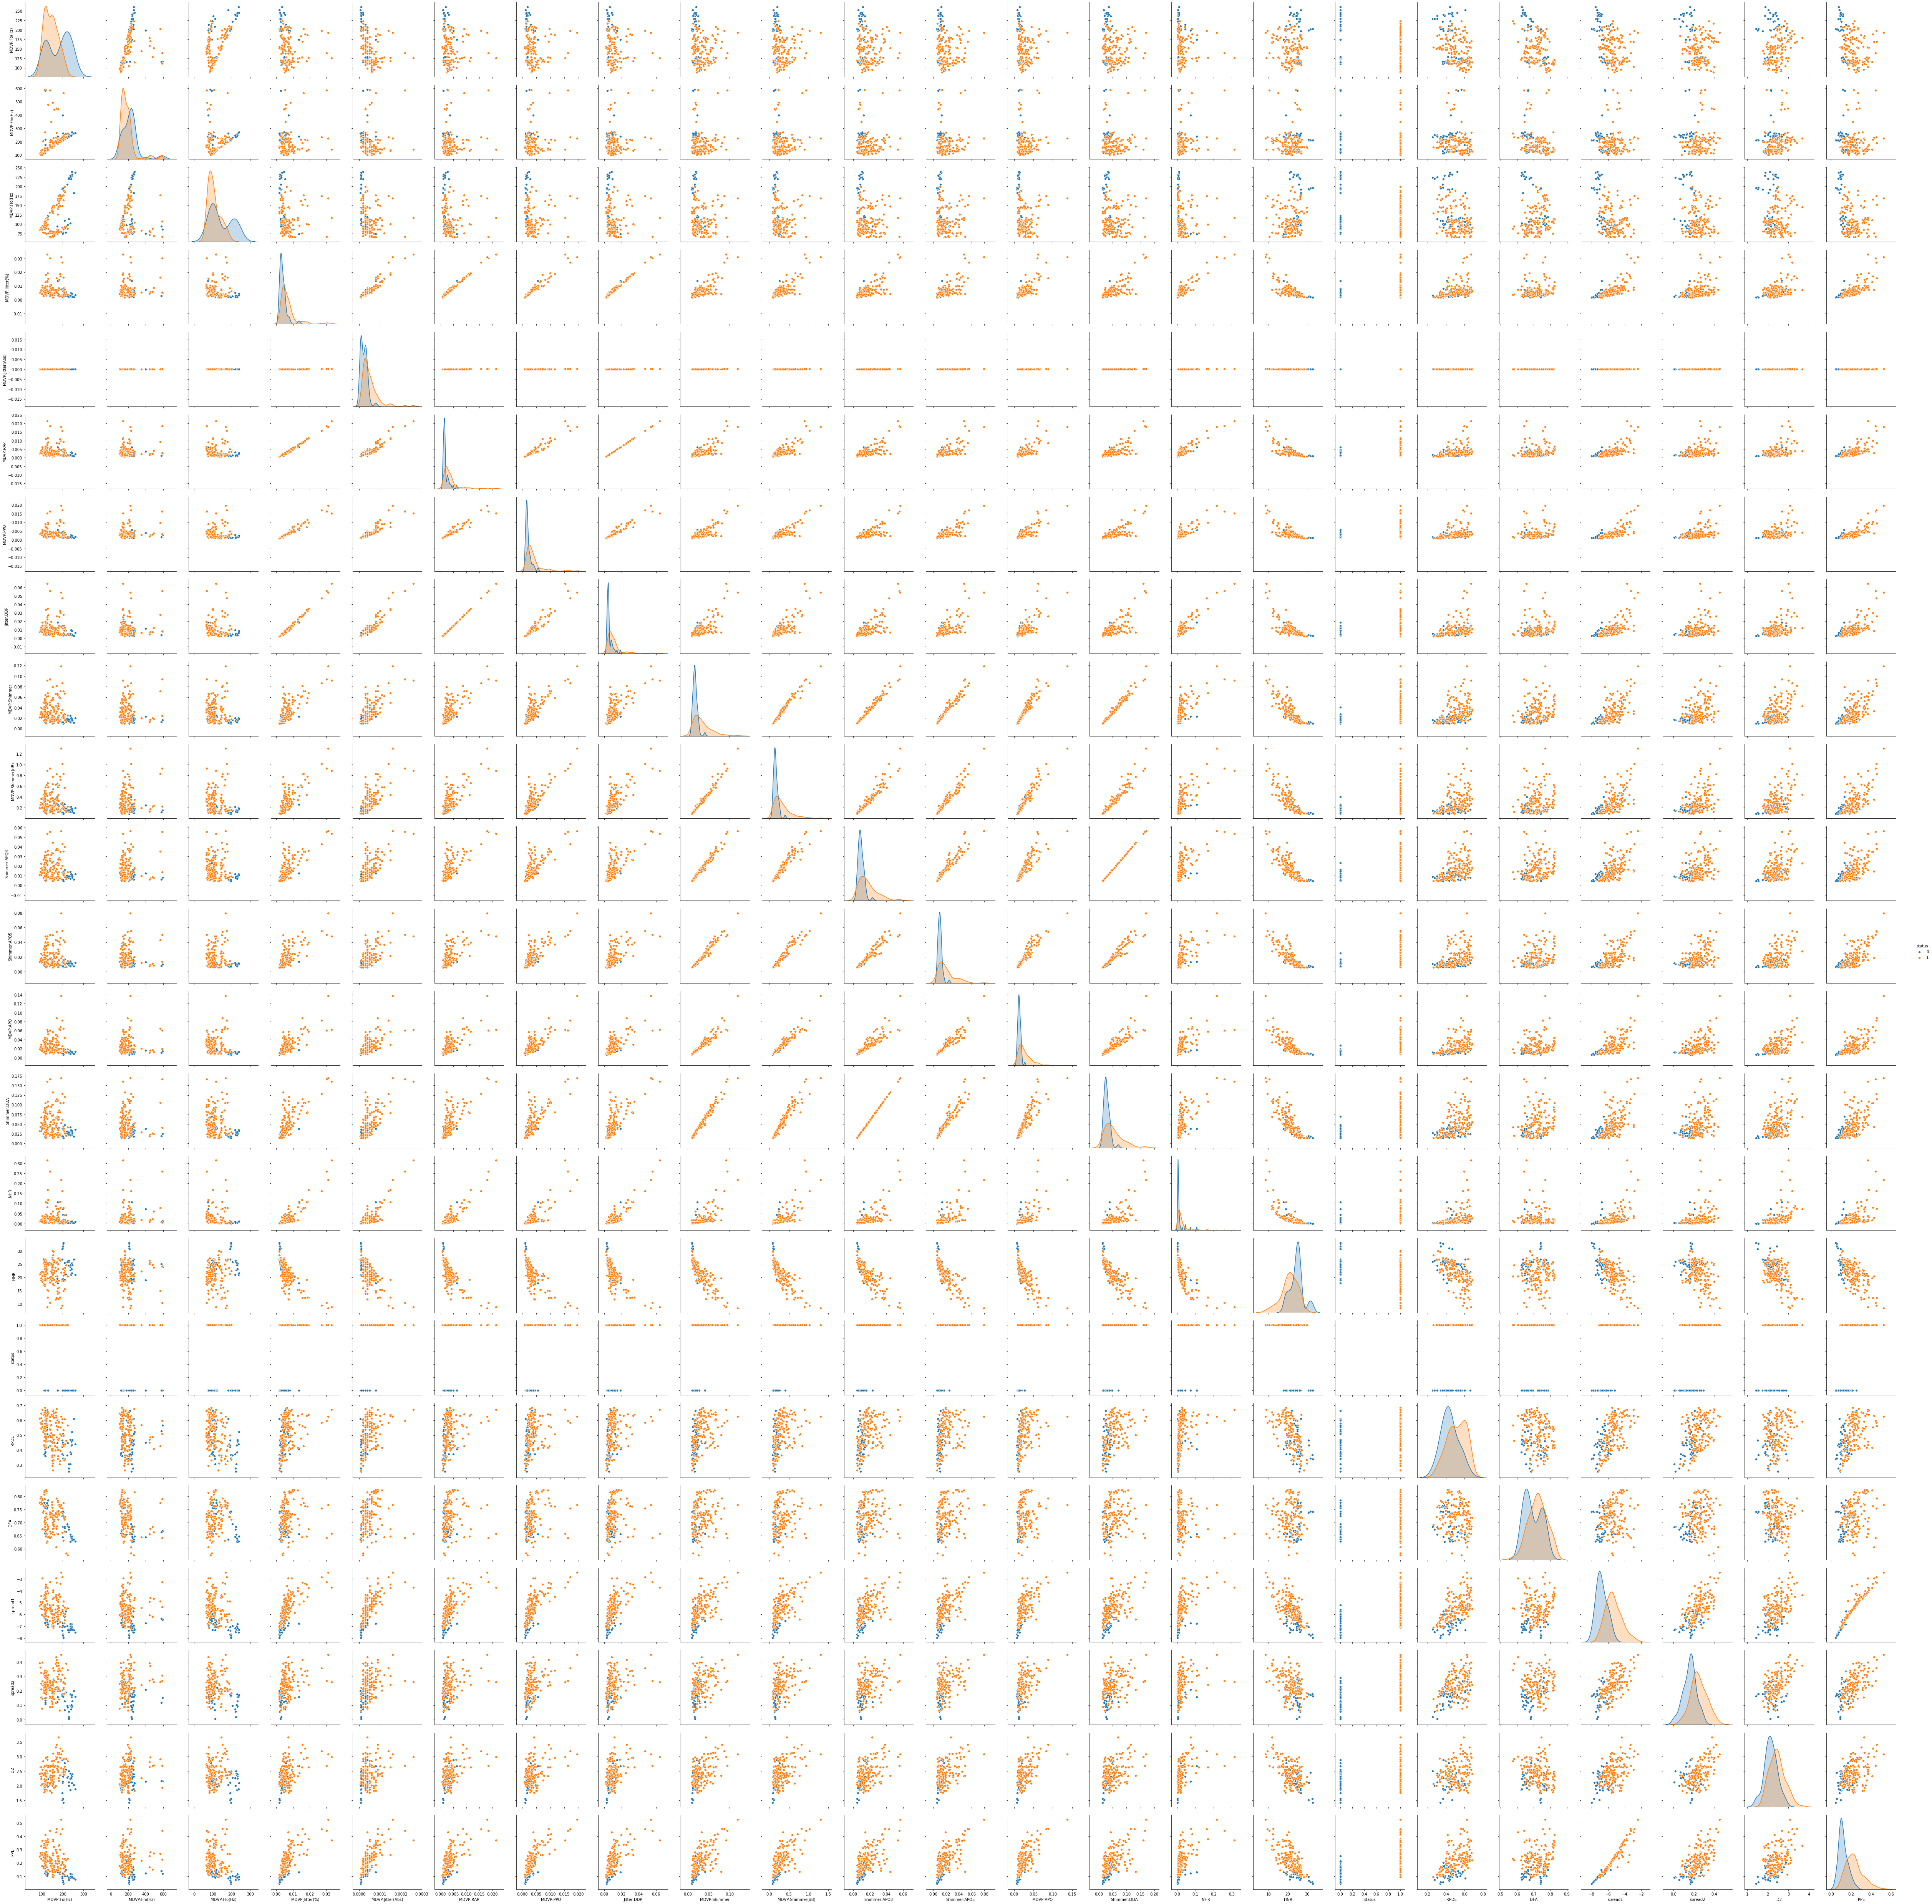

In [12]:
sns.pairplot(adf, hue = 'status', diag_kind='kde',height=3 )    
plt.show()

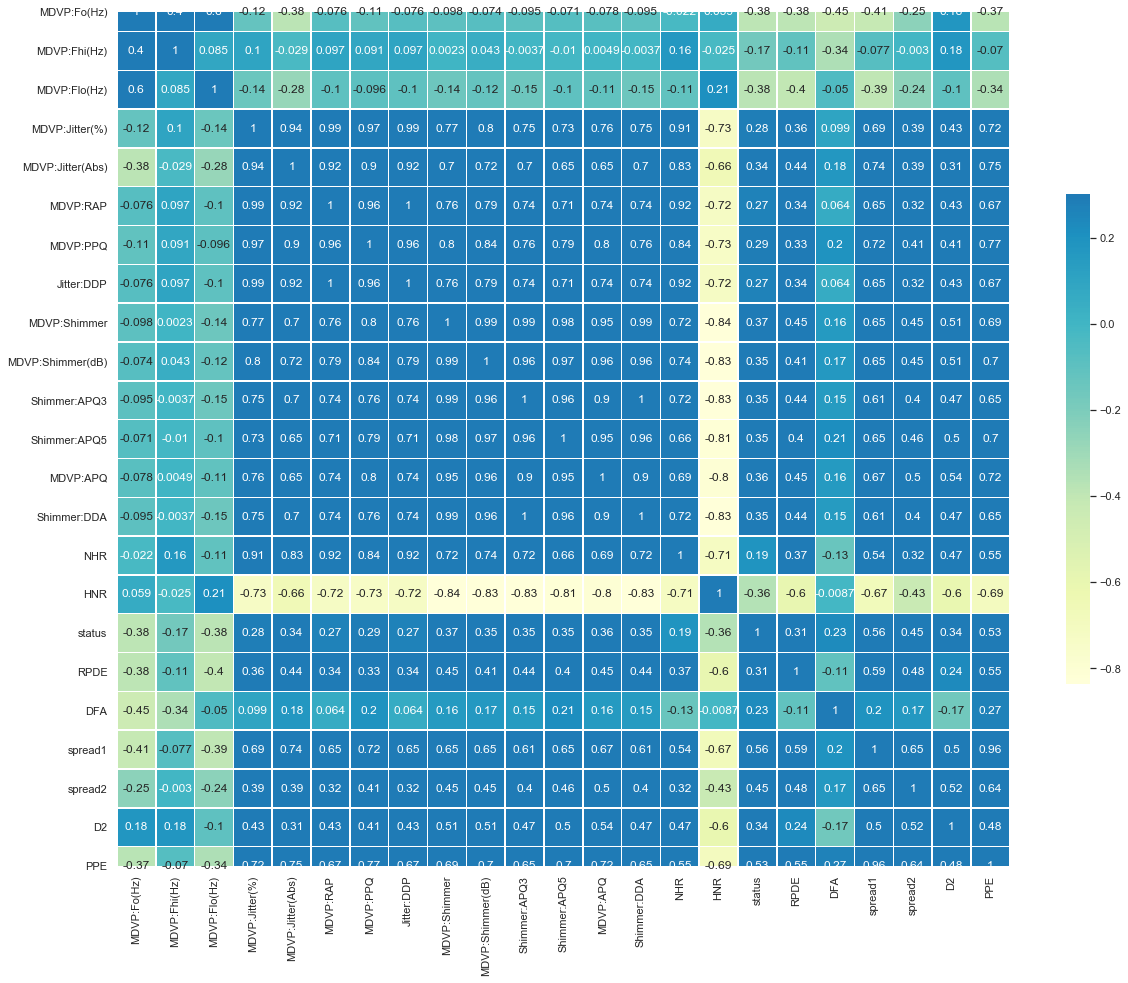

In [13]:
sns.set(style="white")
# Compute the correlation matrix
corr = adf.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,cmap='YlGnBu',  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

> Observation 
 - MDVP:Jitter(%)  has hiegher correlation  with every attribute except Spread2,RPDE,Status.
 - MDVP:Jitter(%) has correlation more than 95% with MDVP:RAP,MDVP:PPQ,MDVP:Jitter(Abs) and Jitter(DDP).
 - MDVP:Shimmer has correction more than 95% with MDVP:Shimmer(dB) ,Shimmer:DDA,Shimmer:APQ3,Shimmer:APQ5 and MDVP:APQ.
 - Status and PPE has higher correlation.
 -  Spread1 and PPE has correlation of 96%.


### Preparing the data for Training.

 -  Our data has attributes which are perfectly(approx) correlated with other columns. As we know algorithms like Logistic           Regression or Linear Regression are not immune to Multicollinearity.
 - We can eliminate attributes which are highly correlated.
 - Scale data for KNN model.
 - Seperate Predictors from the target
 -  Split the data into test and train sets

### KNN Classification.

In [14]:
reg= adf.drop(columns=['MDVP:RAP','MDVP:PPQ','MDVP:Jitter(Abs)','Jitter:DDP','MDVP:Shimmer(dB)' ,
                       'Shimmer:DDA','Shimmer:APQ3','Shimmer:APQ5', 'MDVP:APQ'])

reg

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.02751,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.02308,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.02296,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [15]:
col_x = reg.drop(columns='status')    # Predictors
col_y = y = reg['status']   # target


In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
X_train, X_test, y_train, y_test = train_test_split(col_x, col_y, test_size=0.30,random_state=20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

In [17]:
#We will build KNN model with n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
# Build step forward feature selection
sfs1 = sfs(knn, k_features=13, forward=True, scoring='f1', cv=5)

In [19]:
# Perform step forward feature selection
sfs1 = sfs1.fit(scaledX_train, y_train)

sfs1.get_metric_dict()

{1: {'feature_idx': (12,),
  'cv_scores': array([0.8372093 , 0.93333333, 0.91304348, 0.95238095, 0.88372093]),
  'avg_score': 0.9039375993066588,
  'feature_names': ('12',),
  'ci_bound': 0.051907819539158725,
  'std_dev': 0.040386047080700906,
  'std_err': 0.02019302354035045},
 2: {'feature_idx': (6, 12),
  'cv_scores': array([0.90909091, 0.93333333, 0.91304348, 0.95238095, 0.97674419]),
  'avg_score': 0.9369185718225153,
  'feature_names': ('6', '12'),
  'ci_bound': 0.03242612261734313,
  'std_dev': 0.025228625018253355,
  'std_err': 0.012614312509126676},
 3: {'feature_idx': (6, 9, 12),
  'cv_scores': array([0.88372093, 0.95454545, 0.88888889, 0.95238095, 0.95238095]),
  'avg_score': 0.9263834356857613,
  'feature_names': ('6', '9', '12'),
  'ci_bound': 0.042124501373066295,
  'std_dev': 0.03277429317600801,
  'std_err': 0.016387146588004005},
 4: {'feature_idx': (4, 6, 9, 12),
  'cv_scores': array([0.88372093, 0.95454545, 0.88888889, 0.95238095, 0.95454545]),
  'avg_score': 0.9268

0, 2, 4, 6, 7, 9, 10, 11, 12),

> * With all 13 feature the average **F1 score** is 91%.
* **If we reduce number of features then average F1 score is increasing, this leads to conclusion that not instead of taking all feature to build model we can use important features for building model.**
* from above SFFS learning we can see for feature number 0, 2, 4, 6, 7, 9, 10, 11, 12 we are getting maximum **F1 score** i.e. **94.3%**

In [20]:
l = col_x.columns
l[[0, 2, 4, 6, 7, 9, 10, 11, 12]]

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'HNR', 'RPDE', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

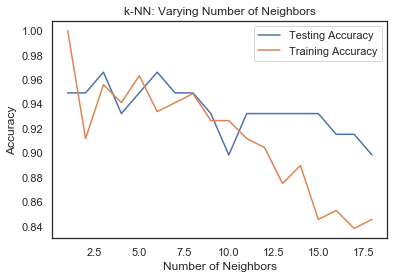

In [21]:
neighbors = np.arange(1, 19)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
X=reg[['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'HNR', 'RPDE', 'spread1',
       'spread2', 'D2', 'PPE']]
y=reg['status']
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

> We can see here that when k = 6 , the testing accuracy is highest. 

In [22]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report
X=reg[['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'HNR', 'RPDE', 'spread1',
       'spread2', 'D2', 'PPE']]
y=reg['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(scaledX_train,y_train)
print('Accuracy score for training set :', knn.score(scaledX_train,y_train)*100)
print('Accuracy score for testing set :', knn.score(scaledX_test,y_test)*100)
pred=knn.predict(scaledX_test)
print('Confusion Matrix : ')
print(confusion_matrix(y_test,pred))
print('classification_report : ')
print(classification_report(y_test,pred))
print('Recall Score : ', recall_score(y_test,pred))
print('Precision Score : ', precision_score(y_test,pred))

Accuracy score for training set : 93.38235294117648
Accuracy score for testing set : 96.61016949152543
Confusion Matrix : 
[[12  0]
 [ 2 45]]
classification_report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.96      0.98        47

    accuracy                           0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59

Recall Score :  0.9574468085106383
Precision Score :  1.0


#####  Above K-NN model with n-neighbors = 6 is having accuracy score of (test accuracy = 96.6% and train accuracy = 93.38) and F1 score = 98% .
##### Above model is having better F1 score so that recall and precision score i.e. 98%

 ### Logistic Regression model.

#### Using feature selection to filter out best feature to predict.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(col_x, col_y, test_size=0.30,random_state=20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
logr = LogisticRegression()
sfs1 = sfs(logr, k_features=12, forward=True, scoring='f1', cv=5)
sfs1 = sfs1.fit(scaledX_train, y_train)
sfs1.get_metric_dict()

{1: {'feature_idx': (12,),
  'cv_scores': array([0.90909091, 0.90909091, 0.90909091, 0.97674419, 0.92682927]),
  'avg_score': 0.9261692363223842,
  'feature_names': ('12',),
  'ci_bound': 0.03367986566226879,
  'std_dev': 0.026204079700977434,
  'std_err': 0.013102039850488717},
 2: {'feature_idx': (11, 12),
  'cv_scores': array([0.88372093, 0.93023256, 0.91304348, 0.97674419, 0.95238095]),
  'avg_score': 0.9312244210120854,
  'feature_names': ('11', '12'),
  'ci_bound': 0.04108011733295728,
  'std_dev': 0.03196172691164477,
  'std_err': 0.015980863455822385},
 3: {'feature_idx': (2, 11, 12),
  'cv_scores': array([0.88372093, 0.93023256, 0.91304348, 0.97674419, 0.95238095]),
  'avg_score': 0.9312244210120854,
  'feature_names': ('2', '11', '12'),
  'ci_bound': 0.04108011733295728,
  'std_dev': 0.03196172691164477,
  'std_err': 0.015980863455822385},
 4: {'feature_idx': (2, 9, 11, 12),
  'cv_scores': array([0.88372093, 0.95238095, 0.91304348, 0.97674419, 0.95238095]),
  'avg_score': 0.9

> From above SFFS learning we can see for feature number 2, 3, 5, 7, 9, 11, 12 we are getting maximum **F1 score** i.e. **93.97%**

In [24]:
l = col_x.columns
l[[2, 3, 5, 7, 9, 11, 12]]

Index(['MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'NHR', 'RPDE', 'spread1', 'D2',
       'PPE'],
      dtype='object')

In [25]:
X = reg[['MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'NHR', 'RPDE', 'spread1', 'D2',
       'PPE']]
y = reg['status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=25)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
#create an instance and fit the model 
logr = LogisticRegression()
logr.fit(scaledX_train, y_train)
#predictions
log_pred = logr.predict(scaledX_test)
print('Accuracy score for training set :', logr.score(scaledX_train,y_train)*100)
print('Accuracy score for testing set :', logr.score(scaledX_test,y_test)*100)
log_pred=logr.predict(scaledX_test)
print('Confusion Matrix : ')
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print('Recall Score : ', recall_score(y_test,log_pred))
print('Precision Score : ', precision_score(y_test,log_pred))

Accuracy score for training set : 88.97058823529412
Accuracy score for testing set : 86.4406779661017
Confusion Matrix : 
[[ 9  6]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59

Recall Score :  0.9545454545454546
Precision Score :  0.875


Above Logiststic regression model having accuracy score of (test accuracy = 86.44% and train accuracy = 88.97) and F1 score = 91% .

## Naive Bayes model.
#### Using feature selection to filter out best feature to predict.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(col_x, col_y, test_size=0.30,random_state=20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
gb = GaussianNB()
sfs1 = sfs(gb, k_features=12, forward=True, scoring='f1', cv=5)
sfs1 = sfs1.fit(scaledX_train, y_train)
sfs1.get_metric_dict()

{1: {'feature_idx': (9,),
  'cv_scores': array([0.86363636, 0.93023256, 0.90909091, 0.97674419, 0.92682927]),
  'avg_score': 0.9213066570412003,
  'feature_names': ('9',),
  'ci_bound': 0.04690370786111405,
  'std_dev': 0.0364926781890614,
  'std_err': 0.0182463390945307},
 2: {'feature_idx': (9, 11),
  'cv_scores': array([0.88372093, 0.92682927, 0.88888889, 0.95238095, 0.92682927]),
  'avg_score': 0.9157298616175531,
  'feature_names': ('9', '11'),
  'ci_bound': 0.033192899211307116,
  'std_dev': 0.025825203258278393,
  'std_err': 0.012912601629139197},
 3: {'feature_idx': (0, 9, 11),
  'cv_scores': array([0.8372093 , 0.95454545, 0.88888889, 0.97674419, 0.92682927]),
  'avg_score': 0.9168434200198238,
  'feature_names': ('0', '9', '11'),
  'ci_bound': 0.0635727050511064,
  'std_dev': 0.04946172430349606,
  'std_err': 0.02473086215174803},
 4: {'feature_idx': (0, 6, 9, 11),
  'cv_scores': array([0.85714286, 0.95238095, 0.88888889, 0.97674419, 0.9       ]),
  'avg_score': 0.915031376891

In [27]:
('0', '6', '9', '11')

('0', '6', '9', '11')

In [28]:
l=col_x.columns
l[[0,6, 9, 11]]

Index(['MDVP:Fo(Hz)', 'HNR', 'spread1', 'D2'], dtype='object')

In [29]:
from sklearn.naive_bayes import GaussianNB
# Spliting the data 
X = reg[['MDVP:Fo(Hz)', 'HNR', 'spread1', 'D2']]
y = reg['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
gb = GaussianNB()
gb.fit(scaledX_train, y_train)
# making predictions
gb_pred = gb.predict(scaledX_test)
print('Accuracy score for training set :', gb.score(scaledX_train,y_train)*100)
print('Accuracy score for testing set :', gb.score(scaledX_test,y_test)*100)
print('Confusion Matrix : ')
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
print('Recall Score : ', recall_score(y_test,gb_pred))
print('Precision Score : ', precision_score(y_test,gb_pred))

Accuracy score for training set : 77.94117647058823
Accuracy score for testing set : 69.49152542372882
Confusion Matrix : 
[[14  3]
 [15 27]]
              precision    recall  f1-score   support

           0       0.48      0.82      0.61        17
           1       0.90      0.64      0.75        42

    accuracy                           0.69        59
   macro avg       0.69      0.73      0.68        59
weighted avg       0.78      0.69      0.71        59

Recall Score :  0.6428571428571429
Precision Score :  0.9


Above Naive baiyes model having accuracy score of (test accuracy = 69.49% and train accuracy = 77.94) and F1 score = 75% .

### Random forest model.

In [43]:
rf= RandomForestClassifier(n_estimators = 50)
rf = rf.fit(X_train, y_train)

In [48]:
pred_RF = rf.predict(X_test)
acc_RF = metrics.accuracy_score(y_test, pred_RF)
acc_RF

0.8305084745762712

In [50]:
Rdf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = Rdf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Random Forest,0.830508


### Adaboost ensemble technique

In [56]:
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [58]:
pred_AB =abcl.predict(X_test)
acc_AB = metrics.accuracy_score(y_test, pred_AB)

In [59]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Random Forest,0.830508
0,Adaboost,0.864407


> Adaboost performs better than Random forest.

### Apply Bagging Classifier Algorithm and print the accuracy.

In [60]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [61]:
pred_BG =bgcl.predict(X_test)
acc_BG = metrics.accuracy_score(y_test, pred_BG)

In [63]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Random Forest,0.830508
0,Adaboost,0.864407
0,Bagging,0.779661
0,Bagging,0.779661


> Bagging has least accuracy score than Random forest and Adaboost.

#### Training meta classifier with base classifier KNN and RandomForest and meta classifier Logistic regression

In [173]:
from mlxtend.classifier import StackingClassifier
from sklearn import datasets
from sklearn import model_selection
clf1= KNeighborsClassifier(n_neighbors=6)
clf2=RandomForestClassifier(n_estimators = 50)
lr= LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2],use_probas=True,meta_classifier=lr)

In [176]:
for clf,label in zip([clf1,clf2,sclf],['KNN','RandomForest','StackingClassifier']):
    scores=model_selection.cross_val_score(clf,col_x,col_y,cv=3,scoring='f1_macro')
    print("f1 scores : %0.2f (+/- %0.2f) [%s]" %  (scores.mean(),scores.std(),label))

f1 scores : 0.66 (+/- 0.10) [KNN]
f1 scores : 0.74 (+/- 0.12) [RandomForest]
f1 scores : 0.69 (+/- 0.20) [StackingClassifier]


> In the meta classifier model the final f1 score is 0.69 


### Comparing different models.

- **KNN Model** - K-NN model with n-neighbors = 6 is having accuracy score of (test accuracy = 96.6% and train accuracy = 93.38) and F1 score = 98% .

- **Logistic Regression** - SFFS learning we are getting  **F1 score** i.e. **93.97%**

- **NAive baiyes** - Naive baiyes model having accuracy score of (test accuracy = 69.49% and train accuracy = 77.94) and F1 score = 75%

- **Random forest** - Above random forest model having accuracy score of = 0.830508
- **Adaboost** - Adaboost having accuracy score of = 0.830508
- **Bagging** - Bagging model having accuracy score of = 0.830508

##### From comparing the all 6 model , the K-NN model outperform all model with an accuracy of 96.6% and F1 score of 98%.

In [106]:
!jupyter nbconvert --to html Untitled.ipynb

[NbConvertApp] Converting notebook Untitled.ipynb to html
[NbConvertApp] Writing 4393805 bytes to Untitled.html
